## Name : Shivanka Priyashan
## Index : 190476V

In [2]:
%matplotlib inline
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

### Question 01

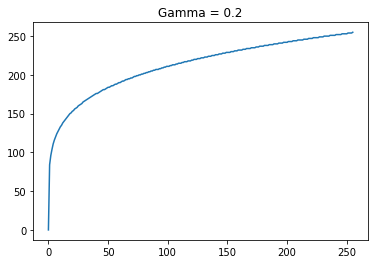

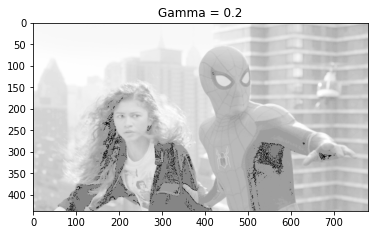

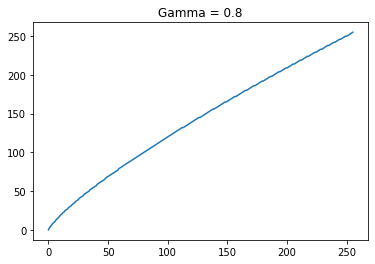

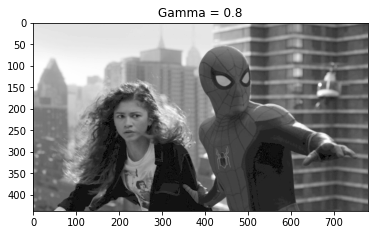

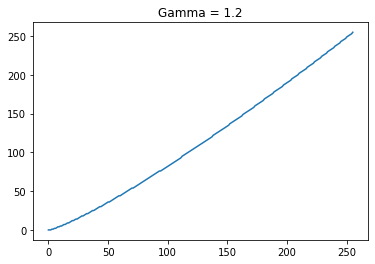

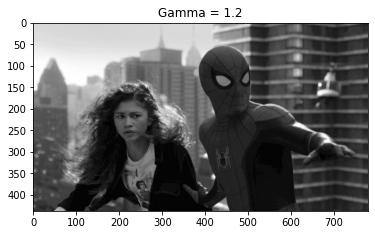

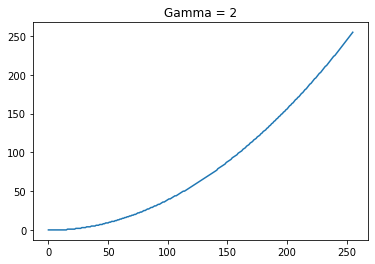

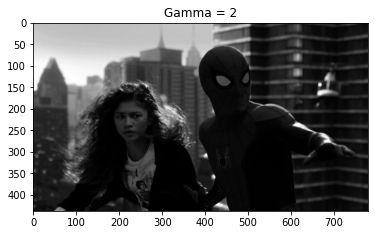

In [3]:
img = cv.imread(r'spider.png',cv.IMREAD_GRAYSCALE)
assert img is not None

gamma = [0.2,0.8,1.2,2]

for g_val in gamma:
    t = np.array([(p/255)**g_val*255 for p in range(0,256)]).astype(np.uint8)
    g = cv.LUT(img,t)
        
    fig, ax = plt.subplots()
    ax.set_title('Gamma = {}'.format(g_val))
    ax.plot(t)

    fig, ax = plt.subplots()
    ax.set_title('Gamma = {}'.format(g_val))
    ax.imshow(g,cmap='gray')

    

### Question 02

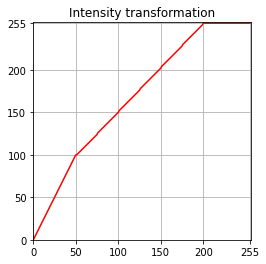

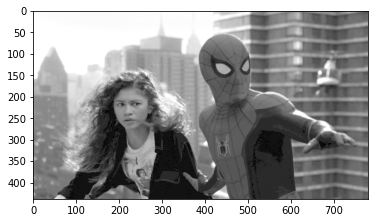

In [4]:
img = cv.imread(r'spider.png',cv.IMREAD_GRAYSCALE)
assert img is not None

t1 = np.linspace(0,100,51)
t2 = np.linspace(100,255,150)
t3 = np.linspace(255,255,55)

t = np.concatenate((t1,t2,t3),axis=0).astype(np.uint8)

fig, ax = plt.subplots()
ax.plot(t,'r')
ax.set_title('Intensity transformation')
ax.set_aspect('equal')
ax.set_xlim([0,256])
ax.set_ylim([0,256])
ax.set_xticks([0,50,100,150,200,255])
ax.set_yticks([0,50,100,150,200,255])
ax.grid()
assert len(t) == 256
g = cv.LUT(img,t)

fig, ax = plt.subplots()
g_img = plt.imshow(g,cmap='gray') 

### Question 03

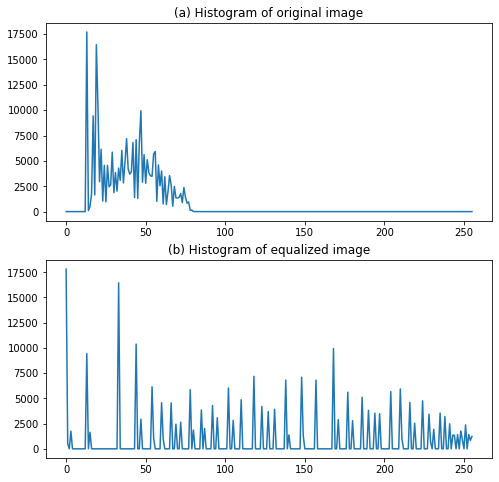

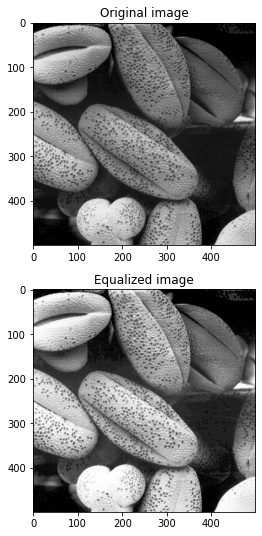

In [38]:
img2 = cv.imread(r'shells.tif',cv.IMREAD_GRAYSCALE)
assert img2 is not None

hist_f = cv.calcHist([img2],[0],None,[256],[0,256])
g = cv.equalizeHist(img2)
hist_g = cv.calcHist([g],[0],None, [256],[0,256])

fig, ax = plt.subplots(2,1,figsize=(8,8))
ax[0].set_title('(a) Histogram of original image')
ax[0].plot(hist_f)
ax[1].set_title('(b) Histogram of equalized image')
ax[1].plot(hist_g)

fig, ax = plt.subplots(2,1,figsize=(9,9))
ax[0].set_title('Original image')
ax[0].imshow(img2,cmap='gray')
ax[1].set_title('Equalized image')
out2 = ax[1].imshow(g,cmap='gray')

### Question 04 (a)

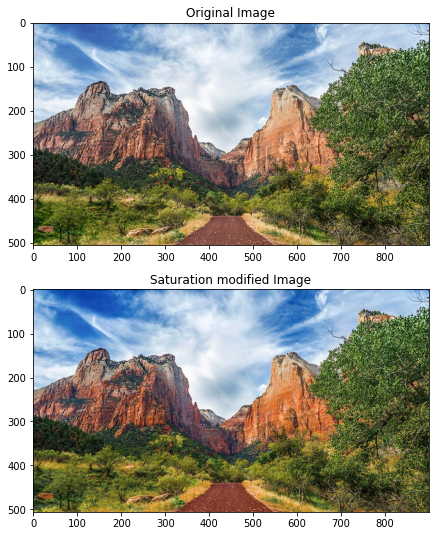

In [34]:
img = cv.imread(r'zion_pass.jpg',cv.IMREAD_COLOR) #Read image in openCV
img_mp = mpimg.imread('zion_pass.jpg') #Read image in matplotlib.image

hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
hsv[:,:,1] = hsv[:,:,1]*1.35

back = cv.cvtColor(hsv,cv.COLOR_HSV2BGR)

mod_img = cv.imwrite('zion_pass_modified.jpg',back)
mod_img_mp = mpimg.imread('zion_pass_modified.jpg')

fig, ax = plt.subplots(2,1,figsize=(9,9))
ax[0].set_title('Original Image')
out1 = ax[0].imshow(img_mp)
ax[1].set_title('Saturation modified Image')
out2 = ax[1].imshow(mod_img_mp)

### Question 04 (b)

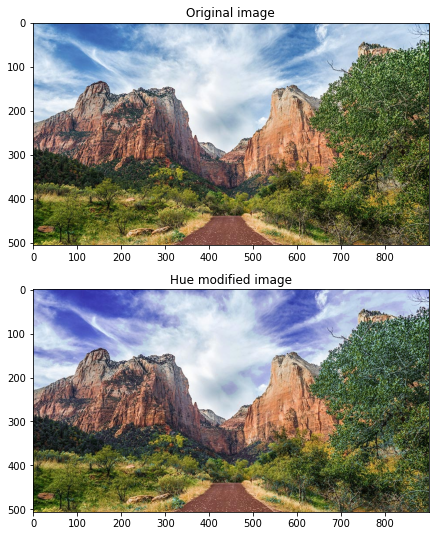

In [35]:
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

lower_blue = np.array([95,50,50])
upper_blue = np.array([130,255,255])

lower_green = np.array([26,10,30])
upper_green = np.array([97,100,255])

blue_mask = cv.inRange(hsv,lower_blue,upper_blue)    #Mask for blue color
green_mask = cv.inRange(hsv,lower_green,upper_green) #Mask for green color

hsv[:,:,0][blue_mask==255] += 10
hsv[:,:,0][green_mask==255] += 50

back = cv.cvtColor(hsv,cv.COLOR_HSV2BGR)

mod_img = cv.imwrite('zion_pass_hue_modified.jpg',back)
mod_img_mp = mpimg.imread('zion_pass_hue_modified.jpg')

fig, ax = plt.subplots(2,1,figsize=(9,9))
ax[0].set_title('Original image')
out1 = ax[0].imshow(img_mp)
ax[1].set_title('Hue modified image')
out2 = ax[1].imshow(mod_img_mp)

